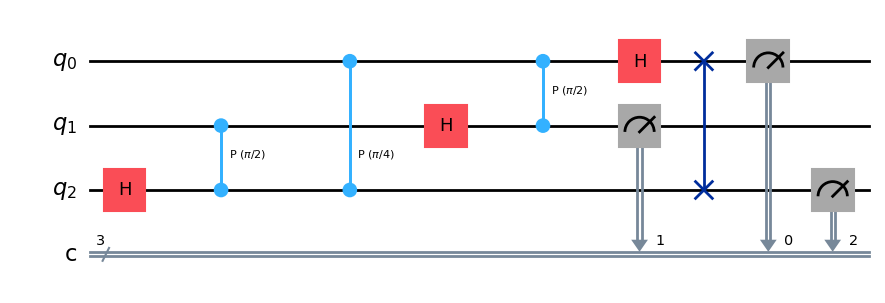

In [1]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector  # Statevectorを使用

import warnings
warnings.simplefilter('ignore')


'''
qft_rotate_single 関数
この関数は、1 つの量子ビット（インデックス i）に対して QFT の「回転操作」を適用しています。
まず、該当量子ビットに Hadamard ゲートを適用して重ね合わせ状態を作ります。
続いて、0 から i-1 までの各量子ビットに対し、制御位相回転ゲート cp を適用しています。
ゲート cp(pi / 2**(i - qubit), qubit, i) は、制御ビット qubit、ターゲットビット i で、位相角が 𝜋/2^(𝑖−qubit) となる制御位相ゲートです。
'''
def qft_rotate_single(circuit, i):
    circuit.h(i)
    for qubit in reversed(range(0, i)):
        circuit.cp(pi / 2**(i - qubit), qubit, i)
        
'''
qft 関数
この関数は、回路全体に対して QFT を適用するための手順をまとめています。
最上位（インデックスが大きい方）から順に各量子ビットに対して qft_rotate_single を適用しています。
※ QFT の回路はビット順序が反対になるため、このような順番で処理する方法も一般的です。
最後に、for i in range(math.floor(n / 2)): により、ビットの順序を逆転するための SWAP 操作を行っています。これは、最終的な QFT の出力がビット逆順になっているため、正しい順序に戻すための処理です。
'''
def qft(circuit, n):
    for i in reversed(range(n)):
        qft_rotate_single(circuit, i)
    for i in range(math.floor(n / 2)):
        circuit.swap(i, n - (i + 1))



########################
#### アルゴリズムの本体
########################
n = 3  # 使用する量子ビット数
qc = QuantumCircuit(n, n)

# QFTを適用
qft(qc, n)

# 測定を追加
for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')


{'101': 1034, '100': 1002, '001': 1008, '010': 1069, '000': 1042, '111': 1001, '011': 1030, '110': 1006}


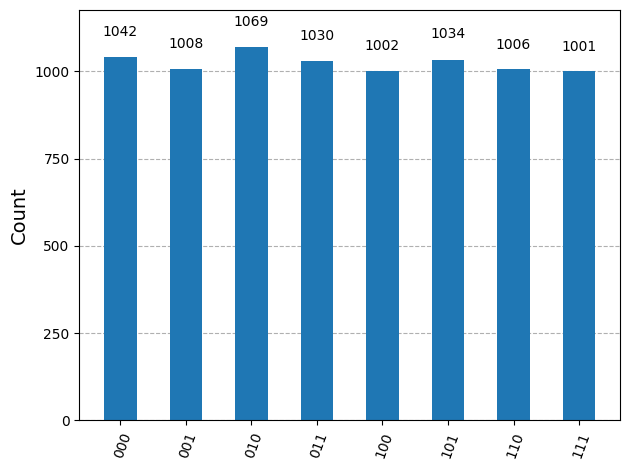

In [2]:
# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=8192).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)
plot_histogram(answer)


In [3]:
n = 3  # 使用する量子ビット数
qc = QuantumCircuit(n, n)

# 状態ベクトルシミュレーション用の回路（測定を含まない）
qc_statevector = QuantumCircuit(n)

# 測定を含まないQFT回路
qft(qc_statevector, n)

# 状態ベクトルを直接取得
statevector = Statevector.from_instruction(qc_statevector)
print(statevector)

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
